In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Preprocessing dei dati: unione e regolarizzazione dei due dataset per creare quello di train

data1 = pd.read_csv('.\\Data\\nar-00132-met-n-2017-File012.csv')
data2 = pd.read_csv('.\\Data\\nar-00132-met-n-2017-File014.csv')

columns = list(map(lambda str: str.strip(), data1.columns)) #elimino gli spazi dal nome delle colonne
data1.columns = columns
data1 = data1.drop(['DE Predicted'], axis='columns') #predizioni eliminate
label_encoder = LabelEncoder() 
data1['DE'] = label_encoder.fit_transform(data1['DE']) #conversione degli attributi da nominali a numerici

columns = list(map(lambda str: str.strip(), data2.columns)) #elimino gli spazi dal nome delle colonne
data2.columns = columns
de = data2['Class'].values
data2 = data2.drop(['Prediction', 'Class'], axis='columns') #predizioni eliminate
data2['DE'] = de #sposto e rinomino la classe di Digenic Effect perchè coincida con quella del primo dataset
data2['DE'] = label_encoder.fit_transform(data2['DE']) #conversione degli attributi da nominali a numerici

data = pd.concat([data1, data2], axis=0) #concatenazione dei due dataset
data.to_excel('.\\Data\\data.xlsx', index = False)

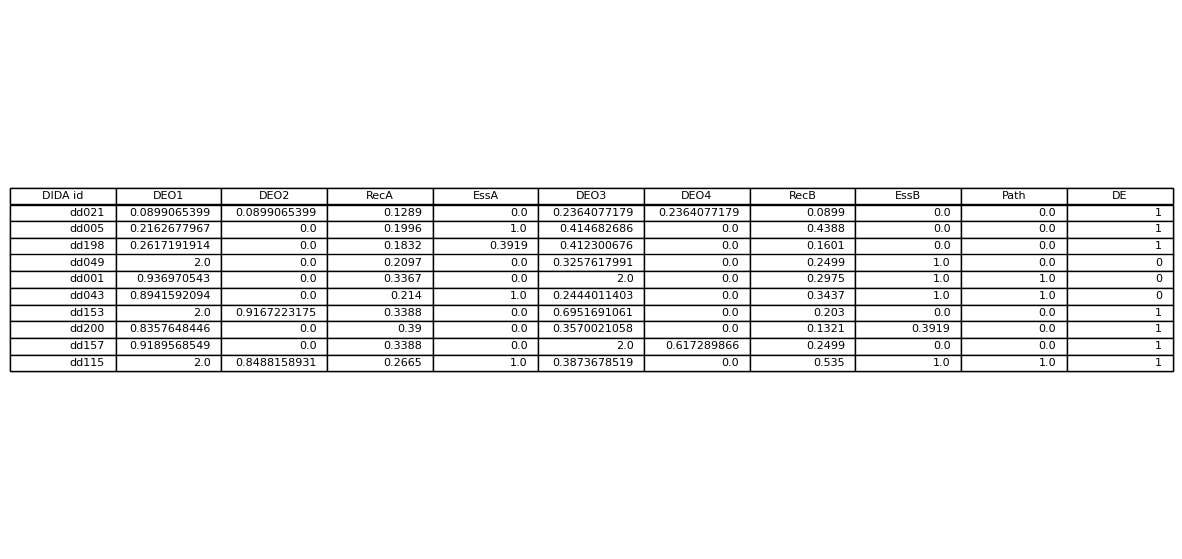

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

#plot delle prime dieci righe del dataset

data = pd.read_excel('.\\Data\\data.xlsx').head(10)
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
table = ax.table(cellText=data.values, colLabels = data.columns, loc='center')
ax.add_table(table)

plt.show()